In [1]:
import xarray as xr
import metview as mv
import numpy as np
from utils import WindSpeedVisualizer, GcpERA5
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
gcp = GcpERA5('gs://gcp-public-data-arco-era5/co/single-level-reanalysis.zarr-v2')
date_range = pd.date_range("2021-05-03T21", periods=2, freq="h")

2024-06-12 12:28:19.031 | INFO     | utils:__init__:155 - ERA5 reanalysis data loaded successfully from gs://gcp-public-data-arco-era5/co/single-level-reanalysis.zarr-v2


In [3]:
gcp.select_data(date_range)
gcp.to_fieldset()
gcp.regrid_to_latlon()
gcp.roll_longitude()
wind_speed = gcp.calculate_wind_speed()

2024-06-12 12:28:20.003 | INFO     | utils:select_data:172 - Data slice selected for date range DatetimeIndex(['2021-05-03 21:00:00', '2021-05-03 22:00:00'], dtype='datetime64[ns]', freq='h')
failed to set key 'stepUnits:int' to 1
failed to set key 'endStep:int' to 0
failed to set key 'stepUnits:int' to 1
failed to set key 'endStep:int' to 0
failed to set key 'stepUnits:int' to 1
failed to set key 'stepUnits:int' to 1
failed to set key 'endStep:int' to 0
failed to set key 'stepUnits:int' to 1
failed to set key 'endStep:int' to 0
failed to set key 'stepUnits:int' to 1
2024-06-12 12:28:23.256 | INFO     | utils:to_fieldset:191 - Selected data slice converted to Metview fieldset successfully
2024-06-12 12:28:24.158 | INFO     | utils:regrid_to_latlon:214 - Fieldset regridded to latitude/longitude coordinates at resolution (0.25, 0.25) successfully
2024-06-12 12:28:24.169 | INFO     | utils:roll_longitude:235 - Longitude coordinates adjusted and sorted successfully
2024-06-12 12:28:24.218 

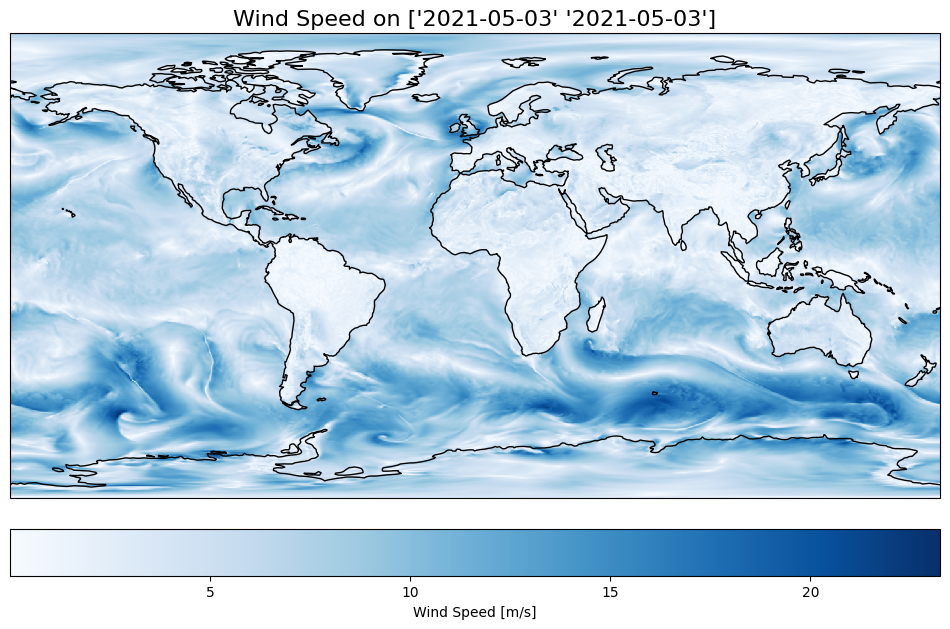

In [4]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
heatmap = ax.pcolormesh(wind_speed.longitude, wind_speed.latitude, wind_speed.sel(time=wind_speed.time[0]),
                        cmap='Blues', transform=ccrs.PlateCarree(), shading='auto')

cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('Wind Speed [m/s]')
plt.title(f'Wind Speed on {np.datetime_as_string(wind_speed.time.values, unit="D")}', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [5]:
wind_anim = WindSpeedVisualizer.generate_animation(wind_speed)

In [6]:
wind_anim